# House Price Prediction Model (Linear Regression)

#### Summary of the Notebook:

1. **Imported the libraries**

***

2. **Imported the House Price Data**

***

3. **Data Preprocessing**
- Descriptive Analysis of Data
- Dealt with Null Values in Data
- Dealt with Outliers
- Feature Engineering
- Feature Selection
- Split the data into Train and Test Data

***

4. **Trained Linear Regression Model**

***

5. **Evaluated the Performance of the Model**

### Importing the required libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

### Importing the data

In [40]:
data = pd.read_csv("Raw_Housing_Prices.csv")
data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


## Data Preprocessing

Removing the **ID** column as its not needed for our model

In [41]:
data.drop("ID", axis=1, inplace=True)
data.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


##### Descriptive Analysis of Data

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date House was Sold                        21613 non-null  object 
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21613 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21604 non-null  float64
 5   Lot Area (in Sqft)                         21604 non-null  float64
 6   No of Floors                               21613 non-null  float64
 7   Waterfront View                            21613 non-null  object 
 8   No of Times Visited                        21613 non-null  object 
 9   Condition of the House                     21613 non-null  object 
 10  Overall Grade         

In [43]:
data.describe(include="all")

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,21613,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613,21613,21613,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
unique,13,NaN,NaN,NaN,NaN,NaN,NaN,2,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,15 April 2016,NaN,NaN,NaN,NaN,NaN,NaN,No,None,Fair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2231,NaN,NaN,NaN,NaN,NaN,NaN,21450,19489,14031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,NaN,NaN,NaN,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,NaN,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,NaN,NaN,NaN,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,NaN,NaN,NaN,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,NaN,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,NaN,NaN,NaN,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,NaN,NaN,NaN,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,NaN,NaN,NaN,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


##### Dealing with Missing Values

In [44]:
data.isnull().sum()

Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

For the **Sale Price** column, which happens to be our target variable, we'll delete the rows having null values.

In [45]:
data.dropna(subset=["Sale Price"], axis=0, inplace=True)
data["Sale Price"].isnull().sum()

0

For the numerical columns having null values, we'll impute them with their median values.

In [46]:
numerical_columns = [
    "No of Bathrooms", "Flat Area (in Sqft)", "Lot Area (in Sqft)", "Area of the House from Basement (in Sqft)", 
    "Latitude", "Longitude", "Living Area after Renovation (in Sqft)"
    ]

In [47]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [48]:
data.isnull().sum()

Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

For the last remaining column i.e. **Zipcode** we will use the imputer to impute it with its mode.

In [49]:
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
data["Zipcode"] = imputer.fit_transform(data["Zipcode"].values.reshape(-1,1))
data["Zipcode"].isnull().sum()

0

#### Dealing with Outliers

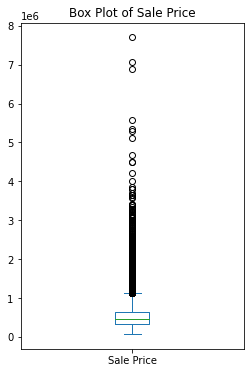

In [50]:
data["Sale Price"].plot(kind="box", figsize=(4,6))
plt.title("Box Plot of Sale Price")
plt.show()

We can observe that there are a lot of outliers in our target variable and therefore we cannot remove it as we'll lose a lot of data. Instead we're going to limit the value of the outliers to the upper and lower bounds, since in our case, there are no outliers below the lower bound, we'll only do it for the ones above the upper bound.

In [51]:
Q1 = data["Sale Price"].quantile(0.25)
Q3 = data["Sale Price"].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + (1.5 * IQR)

data.loc[data["Sale Price"] > upper_bound, "Sale Price"] = upper_bound

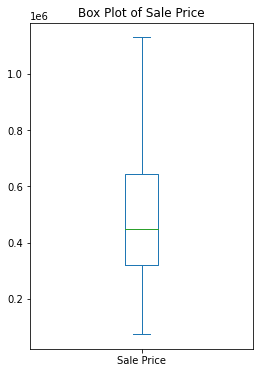

In [52]:
data["Sale Price"].plot(kind="box", figsize=(4,6))
plt.title("Box Plot of Sale Price")
plt.show()

#### Feature Engineering

Now we'll be using feature transformation or generation techniques to enhance the features (independant variables) of our data so that we have a better prediction model.

In [54]:
data["No of Times Visited"].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

Changing **No of Times Visited** column from object type to integer type values.

In [55]:
mapping = {
    'None' : "0",
    'Once' : '1',
    'Twice' : '2',
    'Thrice' : '3',
    'Four' : '4'
}

data["No of Times Visited"] = data["No of Times Visited"].map(mapping)
data["No of Times Visited"].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

Now we'll generate new features from **Date House was Sold** and **Renovated Year** which will have more significance for our model.

In [56]:
data["Ever Renovated"] = np.where(data["Renovated Year"] == 0, "No", "Yes")

In [58]:
data["Purchase Year"] = pd.DatetimeIndex(data["Date House was Sold"]).year

In [59]:
data["Years Since Renovation"] = np.where(data["Ever Renovated"] == "Yes", abs(data["Purchase Year"] - data["Renovated Year"]), 0)

Dropping the columns as we no longer need them and they are redundant.

In [60]:
data.drop(columns=["Purchase Year", "Date House was Sold", "Renovated Year"], inplace=True)
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


<AxesSubplot:xlabel='Condition of the House'>

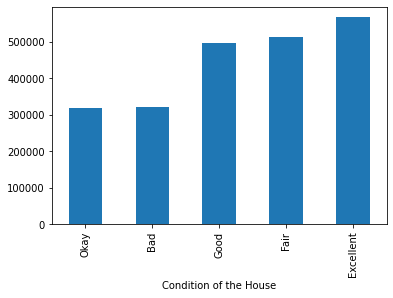

In [61]:
data.groupby("Condition of the House")["Sale Price"].mean().sort_values().plot(kind="bar")

In the above plot, we can notice that the mean sale price of **Bad** and **Okay** & **Good** and **Fair** are similar so, we'll combine them together before encoding.

In [62]:
mapping = {
    "Okay": "Okay",
    "Bad": "Okay",
    "Good": "Good",
    "Fair": "Good",
    "Excellent": "Excellent"
}

data["Condition of the House"] = data["Condition of the House"].map(mapping)

<AxesSubplot:xlabel='Condition of the House'>

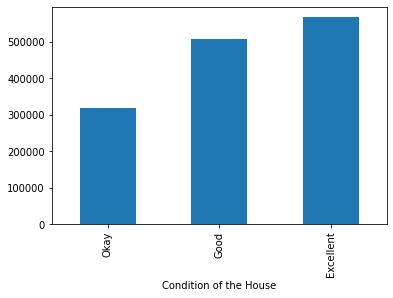

In [63]:
data.groupby("Condition of the House")["Sale Price"].mean().sort_values().plot(kind="bar")

Transforming categorical data into numerical data using dummy variables.

In [65]:
data = pd.get_dummies(data, columns=["Ever Renovated", "Waterfront View", "Condition of the House"], drop_first=True)
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Ever Renovated_Yes,Waterfront View_Yes,Condition of the House_Good,Condition of the House_Okay
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,98178.0,47.5112,-122.257,1340.0,5650,0,0,0,1,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,98125.0,47.7210,-122.319,1690.0,7639,26,1,0,1,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,98028.0,47.7379,-122.233,2720.0,8062,0,0,0,1,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,98136.0,47.5208,-122.393,1360.0,5000,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,98074.0,47.6168,-122.045,1800.0,7503,0,0,0,1,0


Binning Zipcode with similar average sale price into groups.

In [67]:
Zip_Table = data.groupby("Zipcode").agg({"Sale Price": "mean"}).sort_values("Sale Price", ascending=True)
Zip_Table

,Sale Price
Zipcode,
98002.0,2.342840e+05
98168.0,2.403284e+05
98032.0,2.512962e+05
98001.0,2.808047e+05
98148.0,2.849086e+05
...,...
98109.0,7.876028e+05
98112.0,8.807990e+05
98040.0,9.621087e+05


In [68]:
Zip_Table["Zipcode_Group"] = pd.cut(Zip_Table["Sale Price"], bins=10, labels=[
    "Zipcode_Group_0",
    "Zipcode_Group_1",
    "Zipcode_Group_2",
    "Zipcode_Group_3",
    "Zipcode_Group_4",
    "Zipcode_Group_5",
    "Zipcode_Group_6",
    "Zipcode_Group_7",
    "Zipcode_Group_8",
    "Zipcode_Group_9"
], include_lowest=True)

Zip_Table.drop(columns="Sale Price", inplace=True)

Zip_Table

,Zipcode_Group
Zipcode,
98002.0,Zipcode_Group_0
98168.0,Zipcode_Group_0
98032.0,Zipcode_Group_0
98001.0,Zipcode_Group_0
98148.0,Zipcode_Group_0
...,...
98109.0,Zipcode_Group_6
98112.0,Zipcode_Group_7
98040.0,Zipcode_Group_8


Merging the data and the Zip_Table together and dropping the **Zipcode** column from the dataset.

In [69]:
data = pd.merge(data, Zip_Table, left_on="Zipcode", how="left", right_index=True)

data.drop(columns="Zipcode", inplace=True)

data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Ever Renovated_Yes,Waterfront View_Yes,Condition of the House_Good,Condition of the House_Okay,Zipcode_Group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,47.5112,-122.257,1340.0,5650,0,0,0,1,0,Zipcode_Group_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,47.7210,-122.319,1690.0,7639,26,1,0,1,0,Zipcode_Group_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,47.7379,-122.233,2720.0,8062,0,0,0,1,0,Zipcode_Group_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,47.5208,-122.393,1360.0,5000,0,0,0,0,0,Zipcode_Group_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,47.6168,-122.045,1800.0,7503,0,0,0,1,0,Zipcode_Group_4


In [70]:
data = pd.get_dummies(data, columns=["Zipcode_Group"], drop_first=True)

data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Condition of the House_Okay,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


Scaling the data

In [74]:
X = data.drop(columns=['Sale Price'])
y = data['Sale Price']

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
X = pd.DataFrame(data=X1, columns=X.columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Condition of the House_Okay,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.09714,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.09714,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.09714,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.09714,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.09714,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


#### Feature Selection

Now we'll check for multicollinearity and remove it if found.

<AxesSubplot:>

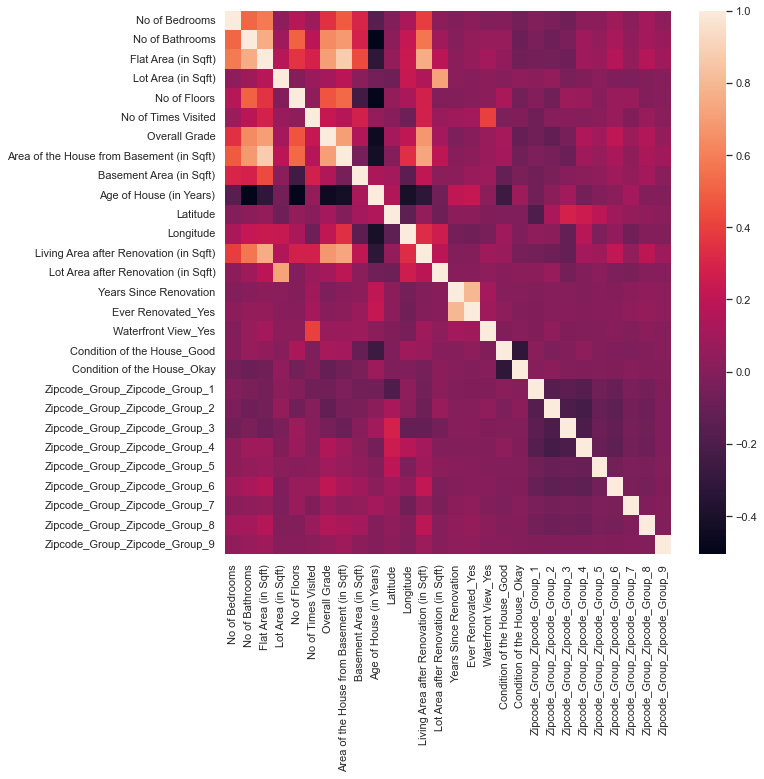

In [78]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.heatmap(X.corr())

In [79]:
corr_table = X.corr()
corr_pair = [[str(i),str(j)] for i in corr_table.columns for j in corr_table.columns if (corr_table.loc[i,j] > abs(0.5))&(i!=j)]

corr_pair

[['No of Bedrooms', 'No of Bathrooms'],
 ['No of Bedrooms', 'Flat Area (in Sqft)'],
 ['No of Bathrooms', 'No of Bedrooms'],
 ['No of Bathrooms', 'Flat Area (in Sqft)'],
 ['No of Bathrooms', 'No of Floors'],
 ['No of Bathrooms', 'Overall Grade'],
 ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
 ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
 ['Flat Area (in Sqft)', 'No of Bedrooms'],
 ['Flat Area (in Sqft)', 'No of Bathrooms'],
 ['Flat Area (in Sqft)', 'Overall Grade'],
 ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
 ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
 ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
 ['No of Floors', 'No of Bathrooms'],
 ['No of Floors', 'Area of the House from Basement (in Sqft)'],
 ['Overall Grade', 'No of Bathrooms'],
 ['Overall Grade', 'Flat Area (in Sqft)'],
 ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
 ['Overall Grade', 'Living Area after R

The above pair of columns have correlation greater than 0.5, so now we'll remove some columns based on their VIF (Variance Inflation Factor) as the ones having VIF over 5 are being explained by the other independant variables and having them in our model will be redundant.

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

VIF

No of Bedrooms                                  1.636526
No of Bathrooms                                 3.374750
Flat Area (in Sqft)                          1481.624517
Lot Area (in Sqft)                              2.108031
No of Floors                                    2.106181
No of Times Visited                             1.432241
Overall Grade                                   2.963022
Area of the House from Basement (in Sqft)    1205.513399
Basement Area (in Sqft)                       345.436517
Age of House (in Years)                         2.490826
Latitude                                        2.448382
Longitude                                       1.670346
Living Area after Renovation (in Sqft)          3.063711
Lot Area after Renovation (in Sqft)             2.143285
Years Since Renovation                          2.777611
Ever Renovated_Yes                              2.896350
Waterfront View_Yes                             1.208215
Condition of the House_Good    

In the above cell, we can see that only 3 columns have VIF over 5, so we'll manually drop them one by one using the drop function and check VIF values again.

In [82]:
X.drop(columns=["Flat Area (in Sqft)"], inplace=True)

VIF = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

VIF

No of Bedrooms                               1.636505
No of Bathrooms                              3.373577
Lot Area (in Sqft)                           2.108022
No of Floors                                 2.106179
No of Times Visited                          1.432241
Overall Grade                                2.962830
Area of the House from Basement (in Sqft)    4.579391
Basement Area (in Sqft)                      1.972187
Age of House (in Years)                      2.490826
Latitude                                     2.448381
Longitude                                    1.670345
Living Area after Renovation (in Sqft)       3.063657
Lot Area after Renovation (in Sqft)          2.143285
Years Since Renovation                       2.777604
Ever Renovated_Yes                           2.896343
Waterfront View_Yes                          1.208209
Condition of the House_Good                  1.223526
Condition of the House_Okay                  1.126863
Zipcode_Group_Zipcode_Group_

Now we can see that no column has a VIF value over 5, so we can confirm that there is no multicollinearity in our data anymore.

#### Splitting the Data into Train and Test set

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15126, 27), (6483, 27), (15126,), (6483,))

## Training Linear Regression Model

In [84]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [85]:
lr.coef_

array([ -3111.27364682,  12335.71581072,  11413.13292736,   2859.30574499,
        28259.51252982,  60942.24409299,  78148.56444975,  26853.71573381,
        31172.48144324,  21240.08236448, -21996.21618954,  18107.93782778,
         -680.66739837,  -9407.70198991,  13111.31374284,   8175.71808667,
       -13364.61393684,  -8032.85774107,  12670.84012683,  34001.38998996,
        62044.25533624,  80507.76293923,  51141.63618918,  73052.19870424,
        39871.64705803,  69126.27605335,  19832.57143204])

In [86]:
y_pred = lr.predict(X_test)

## Evaluating the Performance of the Model

In [87]:
lr.score(X_test, y_test)

0.8437089215580457

So, we got a $R^2$ score of 0.843 for our Linear Regression model which is quite good!

#### Residual Plot

In [88]:
residuals = y_pred - y_test

residual_table = pd.DataFrame({"residuals": residuals, "predictions": y_pred})

residual_table = residual_table.sort_values(by="predictions")

In [89]:
z = [i for i in range(int(residual_table["predictions"].max()))]
k = [0 for i in range(int(residual_table["predictions"].max()))]

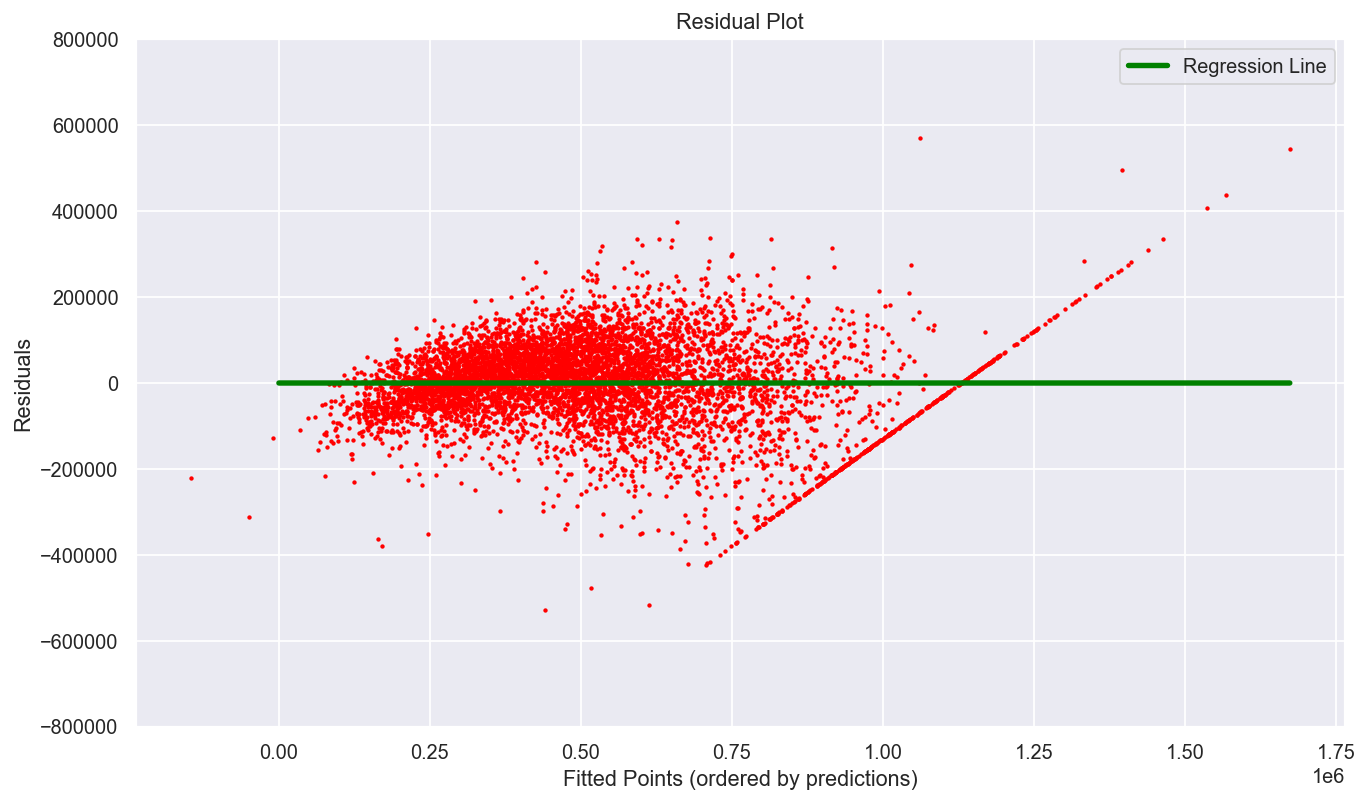

In [90]:
plt.figure(dpi=130, figsize=(12,7))

plt.scatter(residual_table["predictions"], residual_table["residuals"], color="red", s=2)
plt.plot(z, k, color ="green", linewidth=3, label="Regression Line")
plt.ylim(-800000, 800000)
plt.xlabel("Fitted Points (ordered by predictions)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

#### Distribution of Errors

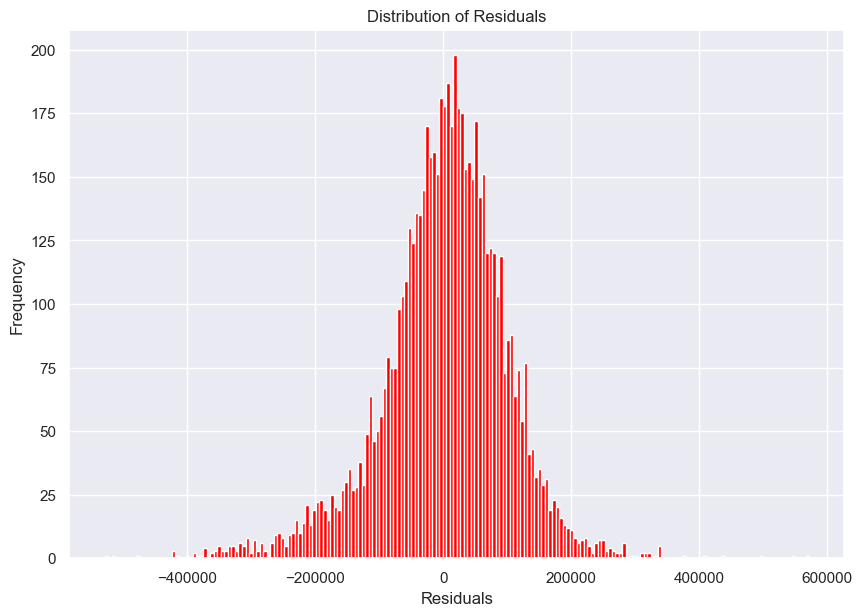

In [91]:
plt.figure(dpi=100, figsize=(10,7))
plt.hist(residual_table["residuals"], color="red", bins=200)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

#### Visualizing Model Coefficients

In [92]:
coefficients_table = pd.DataFrame({"column": X_train.columns, "coefficients": lr.coef_})

coefficient_table = coefficients_table.sort_values(by="coefficients")

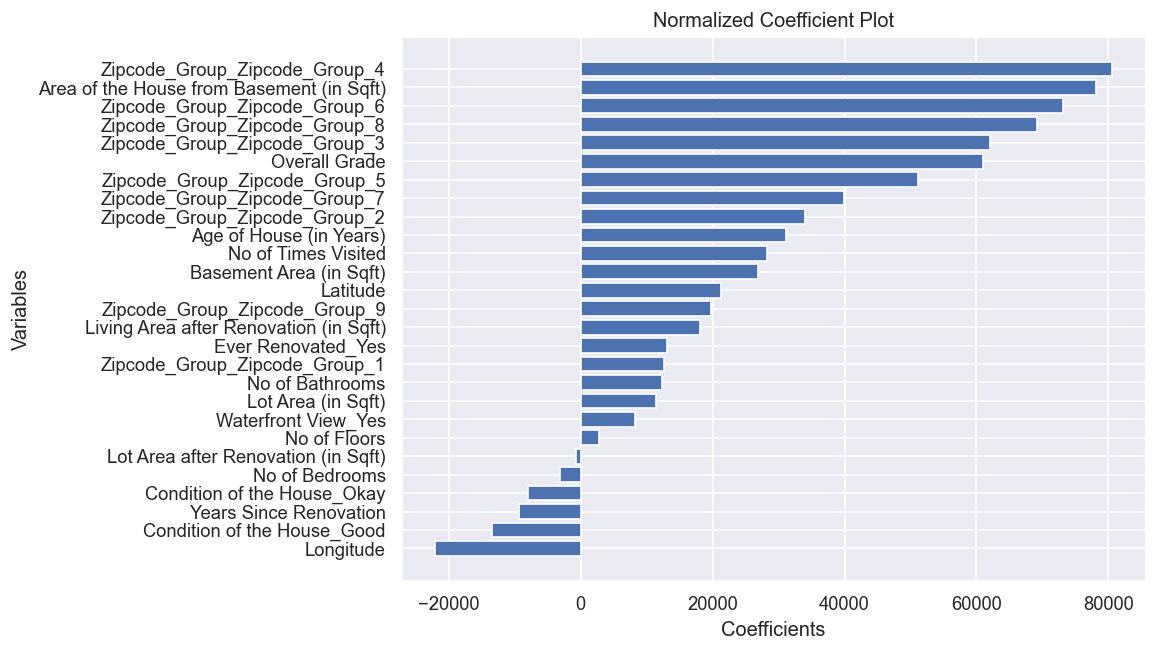

In [93]:
plt.figure(figsize=(8,6), dpi=120)
x = coefficient_table["column"]
y = coefficient_table["coefficients"]
plt.barh(x, y)
plt.xlabel("Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient Plot')
plt.show()